In [1]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import time
from datetime import datetime
import matplotlib.pyplot as plt
# import seaborn as sns
import pickle
# print(ccxt.exchanges) # print a list of all available exchange classes

In [3]:
bitflyer = ccxt.bitflyer()
bitflyer.fetchTrades("FX_BTC_JPY")

[{'buy_child_order_acceptance_id': 'JRF20170916-041725-202068',
  'exec_date': '2017-09-16T04:17:26.18',
  'id': 49182356,
  'price': 421296.0,
  'sell_child_order_acceptance_id': 'JRF20170916-041723-119538',
  'side': 'BUY',
  'size': 0.046},
 {'buy_child_order_acceptance_id': 'JRF20170916-131723-107790',
  'exec_date': '2017-09-16T04:17:25.493',
  'id': 49182354,
  'price': 421296.0,
  'sell_child_order_acceptance_id': 'JRF20170916-041723-119538',
  'side': 'BUY',
  'size': 0.001},
 {'buy_child_order_acceptance_id': 'JRF20170916-131720-912730',
  'exec_date': '2017-09-16T04:17:23.507',
  'id': 49182353,
  'price': 421297.0,
  'sell_child_order_acceptance_id': 'JRF20170916-041721-541208',
  'side': 'BUY',
  'size': 0.001},
 {'buy_child_order_acceptance_id': 'JRF20170916-131719-941081',
  'exec_date': '2017-09-16T04:17:21.773',
  'id': 49182350,
  'price': 421298.0,
  'sell_child_order_acceptance_id': 'JRF20170916-041720-285578',
  'side': 'BUY',
  'size': 0.001},
 {'buy_child_order_ac

In [5]:
def create_df_trade_bitflyerFx(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append([csv_name,trade["id"],trade["exec_date"],trade["size"],trade["side"],trade["price"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=[csv_name,"id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [ ]:
i = 0
trade_dict={}
bitflyer = ccxt.bitflyer()
name = "bitflyer"
sleep_time = 1
while True:
#     if sleep_time > 1:
    time.sleep(sleep_time) # quoineはおこられる
    try:
        trades=bitflyer.fetchTrades("FX_BTC_JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
        if sleep_time>1:
            sleep_time -= 1
        i += 1
    except Exception as e: 
        print(e)
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
        sleep_time = sleep_time + 1
    #     書き込み
    try:
        if i %1000 == 0:
            print(i)
            create_df_trade_bitflyerFx(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except Exception as e: 
        print(e)
        print('Failed to write')
        with open(name+"_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

In [ ]:
i = 0
trade_dict={}
name="bitflyer"
while True:
    try:
        i += 1

        trades=bitflyer.fetchTrades("BTC_JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    except:
        print('Failed to access API')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
    #     書き込み
    try:
        if i %1000 == 0:
            print(i)
            create_df_trade(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except:
        print('Failed to write')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

In [11]:
trade_dict

{43185576: {'buy_child_order_acceptance_id': 'JRF20170828-143453-098366',
  'exec_date': '2017-08-28T05:35:33.087',
  'id': 43185576,
  'price': 464749.0,
  'sell_child_order_acceptance_id': 'JRF20170828-053532-969375',
  'side': 'SELL',
  'size': 0.15},
 43185577: {'buy_child_order_acceptance_id': 'JRF20170828-143522-300953',
  'exec_date': '2017-08-28T05:35:33.087',
  'id': 43185577,
  'price': 464749.0,
  'sell_child_order_acceptance_id': 'JRF20170828-053532-969375',
  'side': 'SELL',
  'size': 0.025},
 43185578: {'buy_child_order_acceptance_id': 'JRF20170828-053349-067700',
  'exec_date': '2017-08-28T05:35:33.087',
  'id': 43185578,
  'price': 464590.0,
  'sell_child_order_acceptance_id': 'JRF20170828-053532-969375',
  'side': 'SELL',
  'size': 0.04800032},
 43185579: {'buy_child_order_acceptance_id': 'JRF20170828-053353-067705',
  'exec_date': '2017-08-28T05:35:33.087',
  'id': 43185579,
  'price': 464590.0,
  'sell_child_order_acceptance_id': 'JRF20170828-053532-969375',
  'side'

In [22]:
df_trade.to_csv("bitflyer.csv")

,coincheck,id,created_at,amount,order_type,rate
created_at,,,,,,
2017-08-26 05:13:59,coincheck,16473904,2017-08-26 05:13:59,0.014700,sell,471548
2017-08-26 05:13:59,coincheck,16473903,2017-08-26 05:13:59,0.008900,sell,471562
2017-08-26 05:14:01,coincheck,16473905,2017-08-26 05:14:01,0.008900,sell,471593
2017-08-26 05:14:01,coincheck,16473909,2017-08-26 05:14:01,0.111500,sell,471443
2017-08-26 05:14:01,coincheck,16473906,2017-08-26 05:14:01,0.000084,sell,471548


In [ ]:
df_trade.

In [19]:
type(df_trade["amount"][0])

str

In [23]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]

In [25]:
df_summary.head()

,amount
created_at,
2017-08-26 05:14:00,20.659907
2017-08-26 05:15:00,19.306314
2017-08-26 05:16:00,25.593196
2017-08-26 05:17:00,21.614201
2017-08-26 05:18:00,14.204539


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

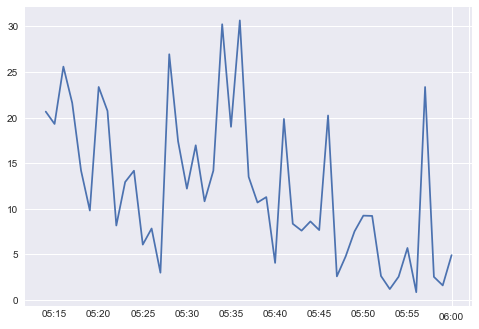

In [31]:
df_summary['amount'].plot()